### 데이터 시각화 패키지 맥플롯리브
matplotlib 패키지는 파이썬에서 데이터를 차트 혹은 플롯으로 시각화하는 패키지
- 선형 그래프 (live plot)
- 점 그래프 (scatter plot)
- 등고선 (contour plot)
- 표면도 (surface plot)
- 막대그래프 (bar chart)
- 히스토그램 (histogram)
- 박스 그래프 (box plot)

#### pyplot 하위 패키지
간단한 시각화 자료를 만들때 사용되는 matplotlib 의 하위 패키지  
matplotlib 패키지를 직접 사용하지 않고 단순히 pyplot 만으로 시각화를 할 수 있음

```python
import matplotlib as mpl
import matplotlib.pyplot as plt
```

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
%matplotlib inline

In [15]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe=fm.FontEntry(
    fname=r'font/NanumGothic.ttf',          # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가

#pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.size': 14, 'font.family': 'NanumGothic'})

#pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False

#### 차트의 종류

**막대 그래프** : 데이터의 카테고리별 값을 막대로 나타내는 방식 (수직 막대 그래프, 수평 막대 그래프)
> 카테고리별로 비교할 때 주로 사용됨 (제품별 판매량, 지역별 인구수)

**선 그래프** : 시간의 흐름에 따른 데이터 포인터를 선으로 연결하여 나타내는 방식
> 시간의 흐름에 따라 비교할 때 주로 사용됨 (기온의 변화,주식가격)

**파이 차트** : 전체에 대한 비율을 원형으로 나타내는 방식 (각 조각의 크기가 해당 부분의 비율을 의미함)
> 전체에 대한 비율을 비교할 때 주로 사용됨

**산점도** : 두 변수 간의 상관 관걔를 점들의 분포로 나타내는 방식
> 두 변수의 상관 관계를 파악할 때 주로 사용됨(키와 몸무게의 상관관계)

**히스토그램** : 범위별로  그룹화해서 각 그룹에 속하는 데이터 포인터의 수를 막대로 나타내는 방식
> 데이터의 분포를 비교할 때 주로 사용됨 (시험 점수의 분포)

**영억 그래프** : 선 그래프의 아래 영역에 색으로 채운 형태
> 시간의 흐름에 따라 비교할 때 주로 사용됨, 변화량을 강조할 때 주로 사용됨 (누적 감염자,누적 수출량)

**박스 그래프** : 데이터의 분포를 나타내는 방식, 최소값, 최대값, 사분위를 나타내는 방식
> 데이터의 이상치를 판단할 때 주로 사용됨 

### 라인 플롯 (선 그래프)
가장 기본적인 그래프로 데이터가 시간의 흐름, 순서에 따라 변할 때 사용됨
pyplot 하위 패키지의 `plot()` 메서드로 간단하게 생성 가능, 매개변수로 리스트 혹은 배열을 전달

<function matplotlib.pyplot.show(close=None, block=None)>

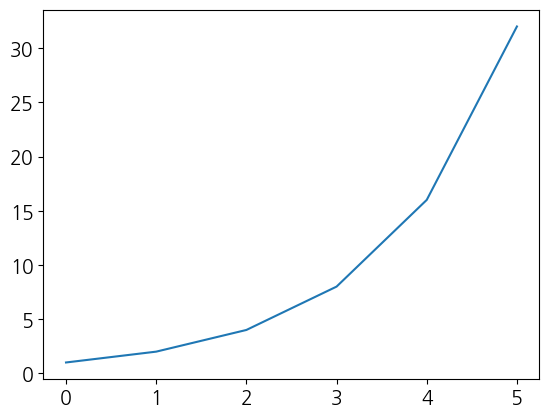

In [22]:
 # x 축의 자료 위치 즉, 틱(tick)은 자동으로 0, 1, 2, 3,4,5 이 된다
plt.plot([1,2,4,8,16,32])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

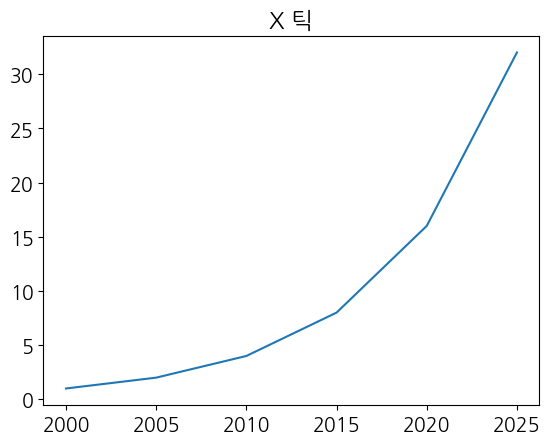

In [31]:
plt.title('X 틱')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32])
plt.show

### 차트 스타일 지정
`plot()` 메서드에 특정한 문자열 매개변수를 전달하면 스타일을 변경할 수 있음 

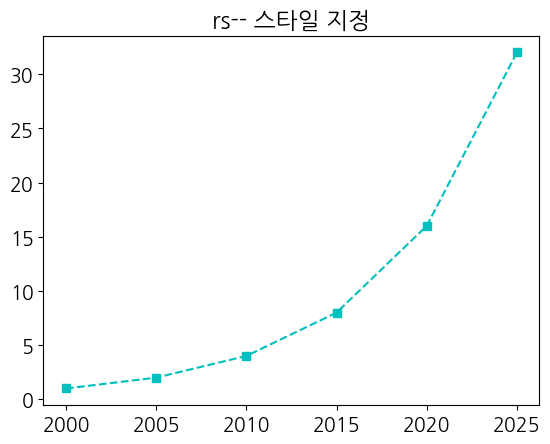

In [38]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],'cs--')
plt.show()

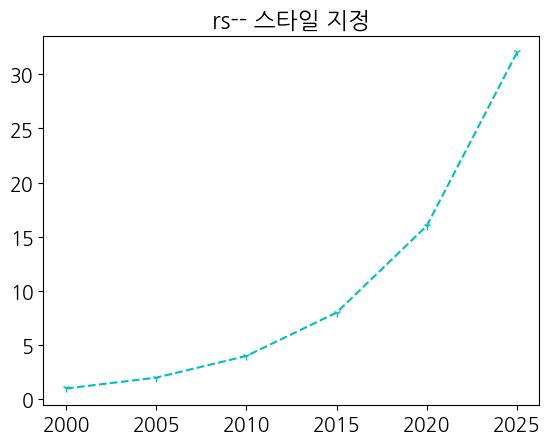

In [42]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],'c1--')
plt.show()

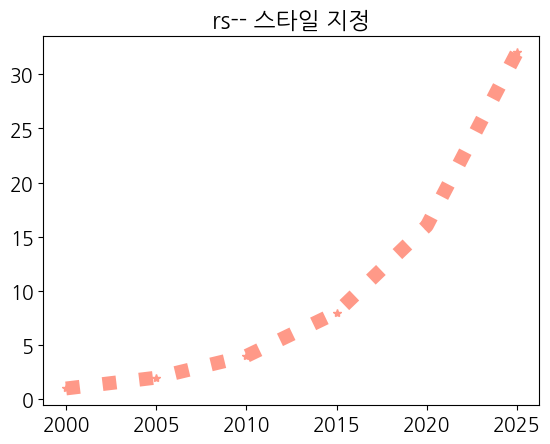

In [50]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],lw=10,c='#ff9988',ls=':',marker='*')
plt.show()

#### `plot()` 메서드의 스타일 매개변수
- color (c) : 선 색깔
- linewidth (lw) : 선 굵기
- linestyle (ls) : 마커 종류
- makersize(ms) : 마커 크기
- markeredgecolor(mec) : 마커 테두리 색상
- markeredgewidth(mew): 마커 테두리 굵기
- markerecolor(mfc) : 마커 내부 색깔

### 차트 범위 지정
`xlim()`, `ylim()` 메서드로 x축과 y축의 상하한 값을 지정할 수 있음

In [ ]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],lw=10,c='#ff9988',ls=':',marker='*',ms=15, mec="g", mew=5, mfc="r")

plt.show()

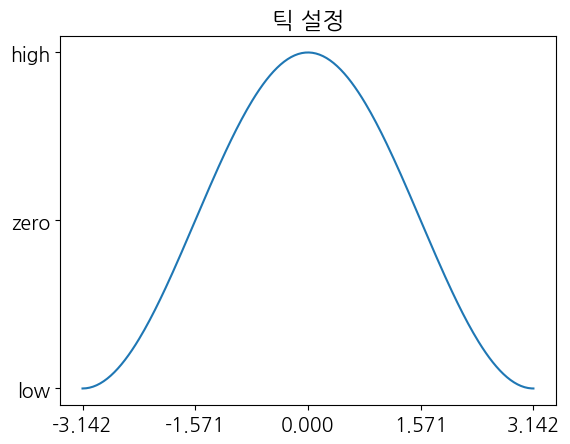

In [57]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title('틱 설정')
plt.plot(X,C) # x축과 Y축에 X , C 넣음
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1,0,1],['low','zero','high'])
plt.show()

### Grid 설정
`grid()` 메서드로 그리드를 표현할지 말지를 정할 수 있음

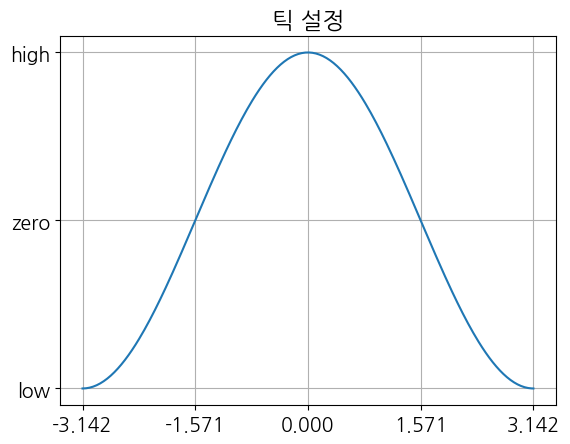

In [58]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title('틱 설정')
plt.plot(X,C) # x축과 Y축에 X , C 넣음
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1,0,1],['low','zero','high'])
plt.grid(True)
plt.show()

### 여러 그래프 하나의 차트에 표현하기
`plot()` 메서드에 x,y,style 매개변수를 반복해서 전달하여  
여러 그래프를 하나의 차트에 표현할 수 있음 (스타일 문자열 생략 불가능)

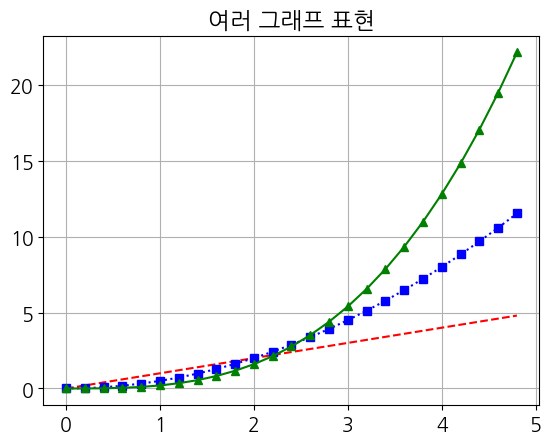

In [60]:
t = np.arange(0.,5.,0.2)
plt.title('여러 그래프 표현')
plt.plot(t,t,'r--',t,0.5 * t ** 2, 'bs:',t,0.2*t**3,'g^-')
plt.grid(True)
plt.show()